In [1]:
#pip install 


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel("Tidied_Dataset.xlsx")
df.head(6)

,Country Name,Year,GDP,Capital Stock,Gross Savings,Labor Force,Population
0,Argentina,1991.0,2.370000e+11,4.660997e+10,4.091763e+10,14697546.0,1.367228
1,Argentina,1992.0,2.570000e+11,5.139950e+10,4.348468e+10,15067090.0,1.356137
2,Argentina,1993.0,2.580000e+11,4.773693e+10,4.667731e+10,15201443.0,1.326272
3,Argentina,1994.0,2.720000e+11,5.340632e+10,5.163931e+10,15563537.0,1.268387
4,Argentina,1995.0,2.930000e+11,6.099097e+10,5.450579e+10,15992986.0,1.205472
5,Argentina,1996.0,2.990000e+11,6.269175e+10,5.516154e+10,16307035.0,1.164910


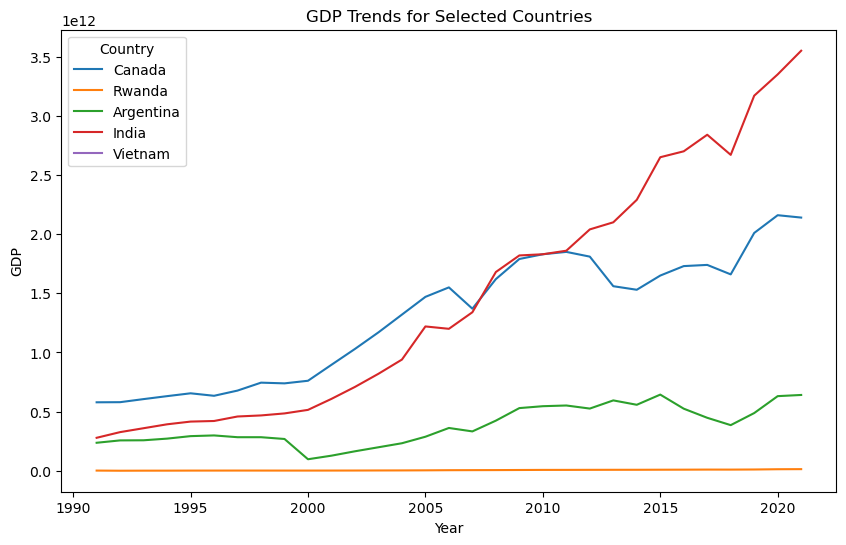

In [11]:
countries_1 = ["Canada", "Rwanda", "Argentina", "India", "Vietnam"]

def GDP_plot_for_countries(countries):
  plt.figure(figsize=(10, 6))
  for country in countries:
    interval = df[df["Country Name"] == country]
    plt.plot(interval["Year"], interval["GDP"], label = country)
  plt.title("GDP Trends for Selected Countries")
  plt.xlabel("Year")
  plt.ylabel("GDP")
  plt.legend(title = "Country")
  plt.show()

GDP_plot_for_countries(countries_1)


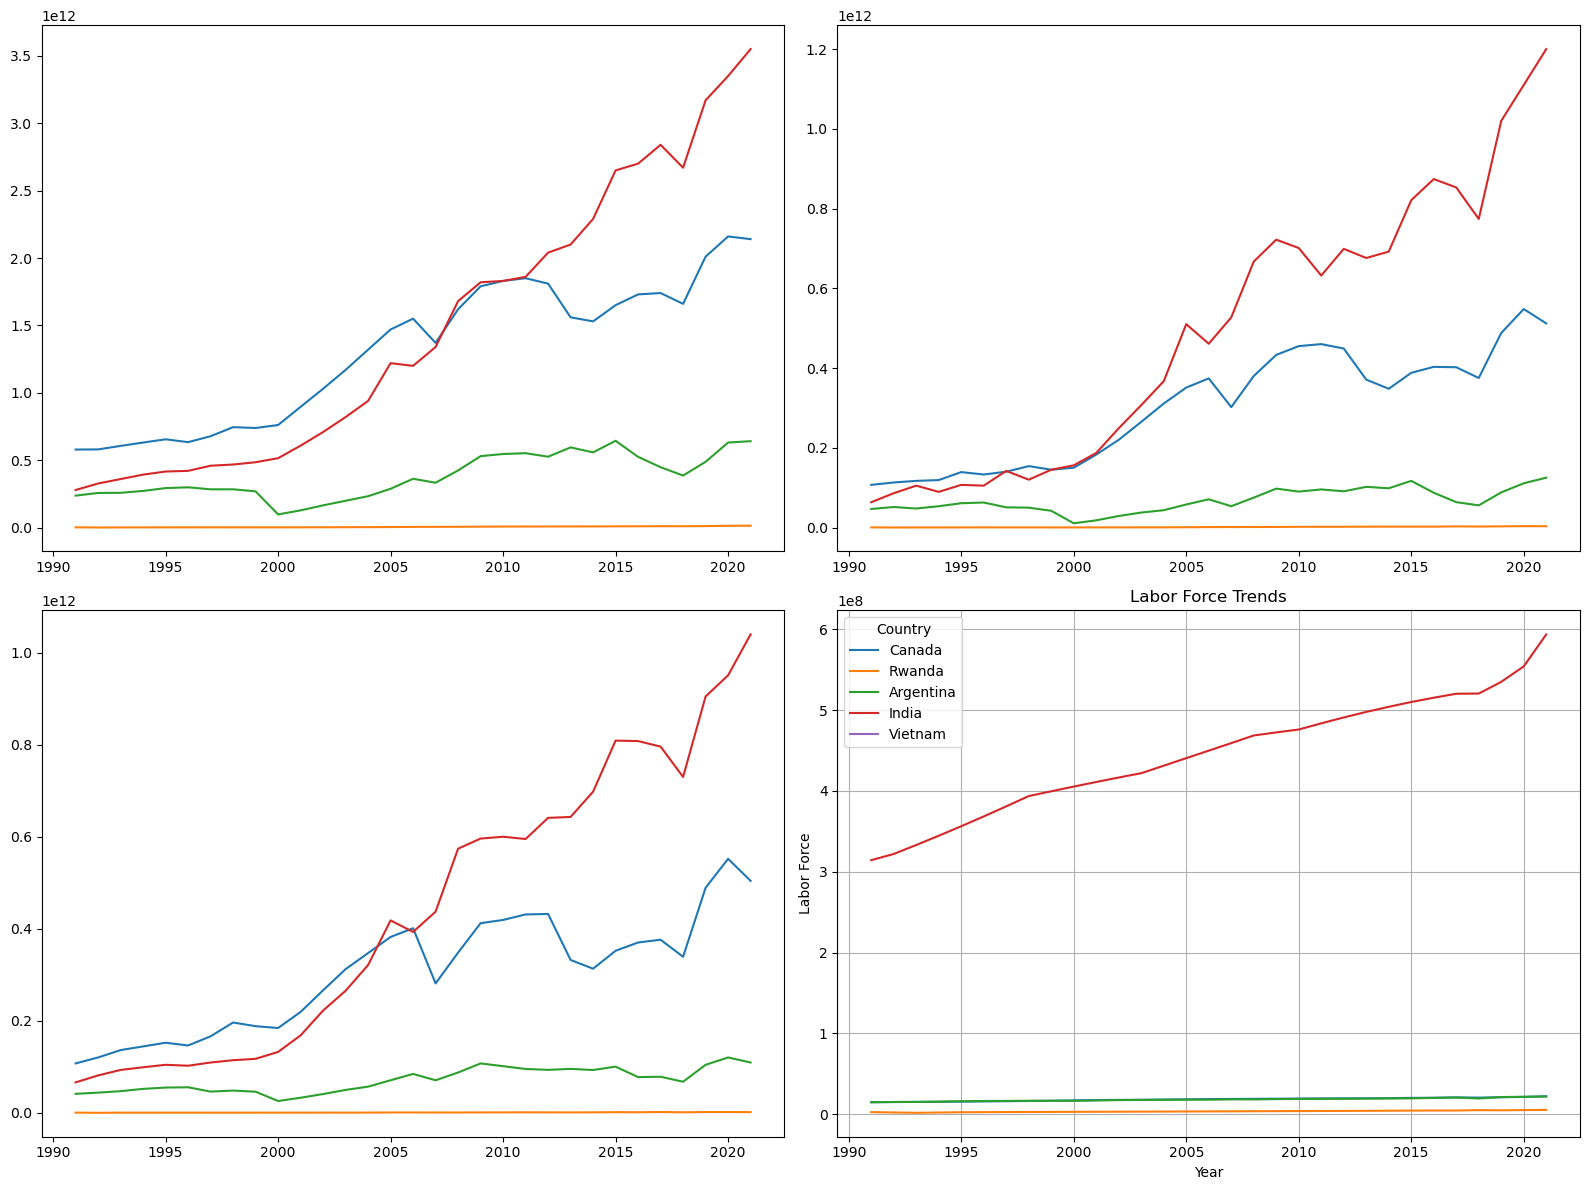

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Example for four different metrics
metrics = ['GDP', 'Capital Stock', 'Gross Savings', 'Labor Force']
titles = ['GDP Trends', 'Capital Stock Trends', 'Gross Savings Trends', 'Labor Force Trends']

# Iterate through axes and plot different metrics
def metrics_plot_for_countries(countries):
  for i, ax in enumerate(axes.flat):
    for country in countries:
        interval = df[df["Country Name"] == country]
        ax.plot(interval['Year'], interval[metrics[i]], label=country)
  ax.set_title(titles[i])
  ax.set_xlabel('Year')
  ax.set_ylabel(metrics[i])
  ax.legend(title="Country")
  ax.grid()
  plt.tight_layout()
  plt.show()

metrics_plot_for_countries(countries_1)

To make a prediction model for a country's steady state condition, we must first define the steady-state condition of a economy. The idea focuses on the Cobb-Douglas function which we are familiar with (from lectures).

$$Y = F(K, L) = AL^{\alpha}K^{1-\alpha}$$
Where $Y$ denotes economic output, $A$ denotes total factor productivity (which can be interpreted as technological level), $L$ denotes labor, $K$ denotes capital and $\alpha$ denotes labor elasticity of output (making $1-\alpha$ the capital elasticity of output).

Y denotes output of the economy, we can denote the output per worker (labor) as 
$$\frac{Y}{L} = \frac{AK^{\alpha}L^{1-\alpha}}{L}$$
$$\frac{Y}{L} = \frac{AK^{\alpha}L}{LL^{\alpha}}$$
$$\frac{Y}{L} = \frac{AK^{\alpha}}{L^{\alpha}}$$
$$\frac{Y}{L} = A(\frac{K}{L})^{\alpha}$$

In economics, variables divided by labor are interpreted as the growth rate of that variable (if applicable), growth rates are typically denoted as the lower case of its associated variable. Therefore, we can represent growth rate of output as:
$$y = Ak^{\alpha}$$

Our goal is to approximate the steady state condition of the economy, which occurs at equilibrium. Equilibrium condition states that saving and investment are equal, which means (according to neoclassical growth theory) the saving rate and investment are equal.

We denote the savings rate as $s = \frac{S}{L}$ and investment rate as $i = \frac{I}{L}$, but to fit this into our model, we must first understand the law of motion for capital.

First, we define our investment-saving identity:
$$S = I = sY$$

Which means savings rate is:
$$s = S/Y$$

In discrete time `t`, the law of motion defines capital stock in thefuture period as: 
$$K_{t+1} = I + (1-\delta)K$$

Where $\delta$ is the depreciation rate of capital in the economy. Solow's model states that capital stock evolves by reinvestment that replaces depreciating capital, as capital grows from investment but declines from depreciation. This concept was used by Solow to derive the process of **capital accumulation** in the economy, which can be described as the "engine" of growth. 

We can denote population growth as $N/L = n$, the rate of effective depreciation of capital can be described as $n + \delta$. Avoiding tedious proof, Solow's growth equation is stated as a definiting for capital accumulation (denoted as $\dot{k}$): 
$$\dot{k} = sy - (\delta + n)k$$

Solow states that steady condition is when capital accumulation is 0, which can be interpreted as the effective depreciation of capital being offset by saving in the economy.
$$0 = sy - (\delta + n)k$$
$$sy = (\delta + n)k$$

Subbing in our $y$ from above:

$$sAk^{\alpha} =(\delta + n)k$$

We find steady-state capital per worker by isolating $k$, and after some algebra we get: 
$$k_{ss}^{*} = (\frac{sA}{n+\delta})^{\frac{1}{1-\alpha}}$$

We can estimate using Solow's residual, which defines a country's total factor productivity as: 
$$A = \frac{Y}{K^{\alpha} \times L^{1-\alpha} }$$

In [13]:
df.head(6)

,Country Name,Year,GDP,Capital Stock,Gross Savings,Labor Force,Population
0,Argentina,1991.0,2.370000e+11,4.660997e+10,4.091763e+10,14697546.0,1.367228
1,Argentina,1992.0,2.570000e+11,5.139950e+10,4.348468e+10,15067090.0,1.356137
2,Argentina,1993.0,2.580000e+11,4.773693e+10,4.667731e+10,15201443.0,1.326272
3,Argentina,1994.0,2.720000e+11,5.340632e+10,5.163931e+10,15563537.0,1.268387
4,Argentina,1995.0,2.930000e+11,6.099097e+10,5.450579e+10,15992986.0,1.205472
5,Argentina,1996.0,2.990000e+11,6.269175e+10,5.516154e+10,16307035.0,1.164910


In [21]:
#solow_parameters 
N = df['Population']
Y = df['GDP']
K = df['Capital Stock']
L = df['Labor Force']
a = 0.33

n = N.pct_change().fillna(0)
y = df['GDP']/df['Labor Force'] #output per worker
k = df['Capital Stock']/df['Labor Force'] #capital per worker
s = df['Gross Savings']/df['GDP']

#define TFP 
A = Y/((K**a)*(L**(1-a)))



solow_df = pd.DataFrame({
    'Country': df['Country Name'],
    'Year': df['Year'],
    'Population Growth': n, 
    'Output Per Worker': y,
    'Capital Per Worker': k, 
    'Savings Rate': s,
    'TFP': A
}
)
solow_df.to_excel("Solow_Model_Data.xlsx", index=False)

solow_df = pd.read_excel("Solow_Model_Data.xlsx")
solow_df = solow_df.dropna()
solow_df['Year'] = solow_df['Year'].apply(int)
solow_df


C:\Users\achan\AppData\Local\Temp\ipykernel_144\1645008074.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  n = N.pct_change().fillna(0)


,Country,Year,Population Growth,Output Per Worker,Capital Per Worker,Savings Rate,TFP
0,Argentina,1991,0.000000,16125.140891,3171.275686,0.172648,1127.447424
1,Argentina,1992,-0.008112,17057.042866,3411.375422,0.169201,1164.225214
2,Argentina,1993,-0.022022,16972.072980,3140.289576,0.180920,1190.515051
3,Argentina,1994,-0.043645,17476.747092,3431.502736,0.189850,1190.558572
4,Argentina,1995,-0.049602,18320.531263,3813.607184,0.186027,1205.305664
...,...,...,...,...,...,...,...
785,United States,2017,-0.135280,128665.076314,27947.251460,0.190233,4387.011553
786,United States,2018,1.133364,128584.862973,27528.027003,0.184977,4406.198600
787,United States,2019,-0.838282,141998.799653,30325.167383,0.177119,4712.915086
788,United States,2020,1.337949,152810.659239,33475.642471,0.181323,4909.000829


Economic theory states that steady state capital per worker is found under the assumption that the Solow model parameters are constant over time. However, this does not apply to real life as such parameters vary every year (as seen from our dataset). Our approach for this project would be to find steady state capital per worker every year for each country.

In [22]:
#redefine solow parameters
n = solow_df['Population Growth'] #pop growth
y = solow_df['Output Per Worker'] #output per worker
k = solow_df['Capital Per Worker']
s = solow_df['Savings Rate']
d = 0.05 #assume delta to be constant across all countries 
a = 0.33 #assume alpha to be constant across all countries
A =  solow_df['TFP'] #log transformation handles outliers
exp = 1/(1-a)
frac = (s * A) / (n + d)
k_ss = frac**exp
solow_df['Steady State Capital Per Worker'] = k_ss
solow_df

,Country,Year,Population Growth,Output Per Worker,Capital Per Worker,Savings Rate,TFP,Steady State Capital Per Worker
0,Argentina,1991,0.000000,16125.140891,3171.275686,0.172648,1127.447424,2.283702e+05
1,Argentina,1992,-0.008112,17057.042866,3411.375422,0.169201,1164.225214,3.027755e+05
2,Argentina,1993,-0.022022,16972.072980,3140.289576,0.180920,1190.515051,6.318332e+05
3,Argentina,1994,-0.043645,17476.747092,3431.502736,0.189850,1190.558572,6.202906e+06
4,Argentina,1995,-0.049602,18320.531263,3813.607184,0.186027,1205.305664,3.833683e+08
...,...,...,...,...,...,...,...,...
785,United States,2017,-0.135280,128665.076314,27947.251460,0.190233,4387.011553,NaN
786,United States,2018,1.133364,128584.862973,27528.027003,0.184977,4406.198600,1.721527e+04
787,United States,2019,-0.838282,141998.799653,30325.167383,0.177119,4712.915086,NaN
788,United States,2020,1.337949,152810.659239,33475.642471,0.181323,4909.000829,1.547606e+04


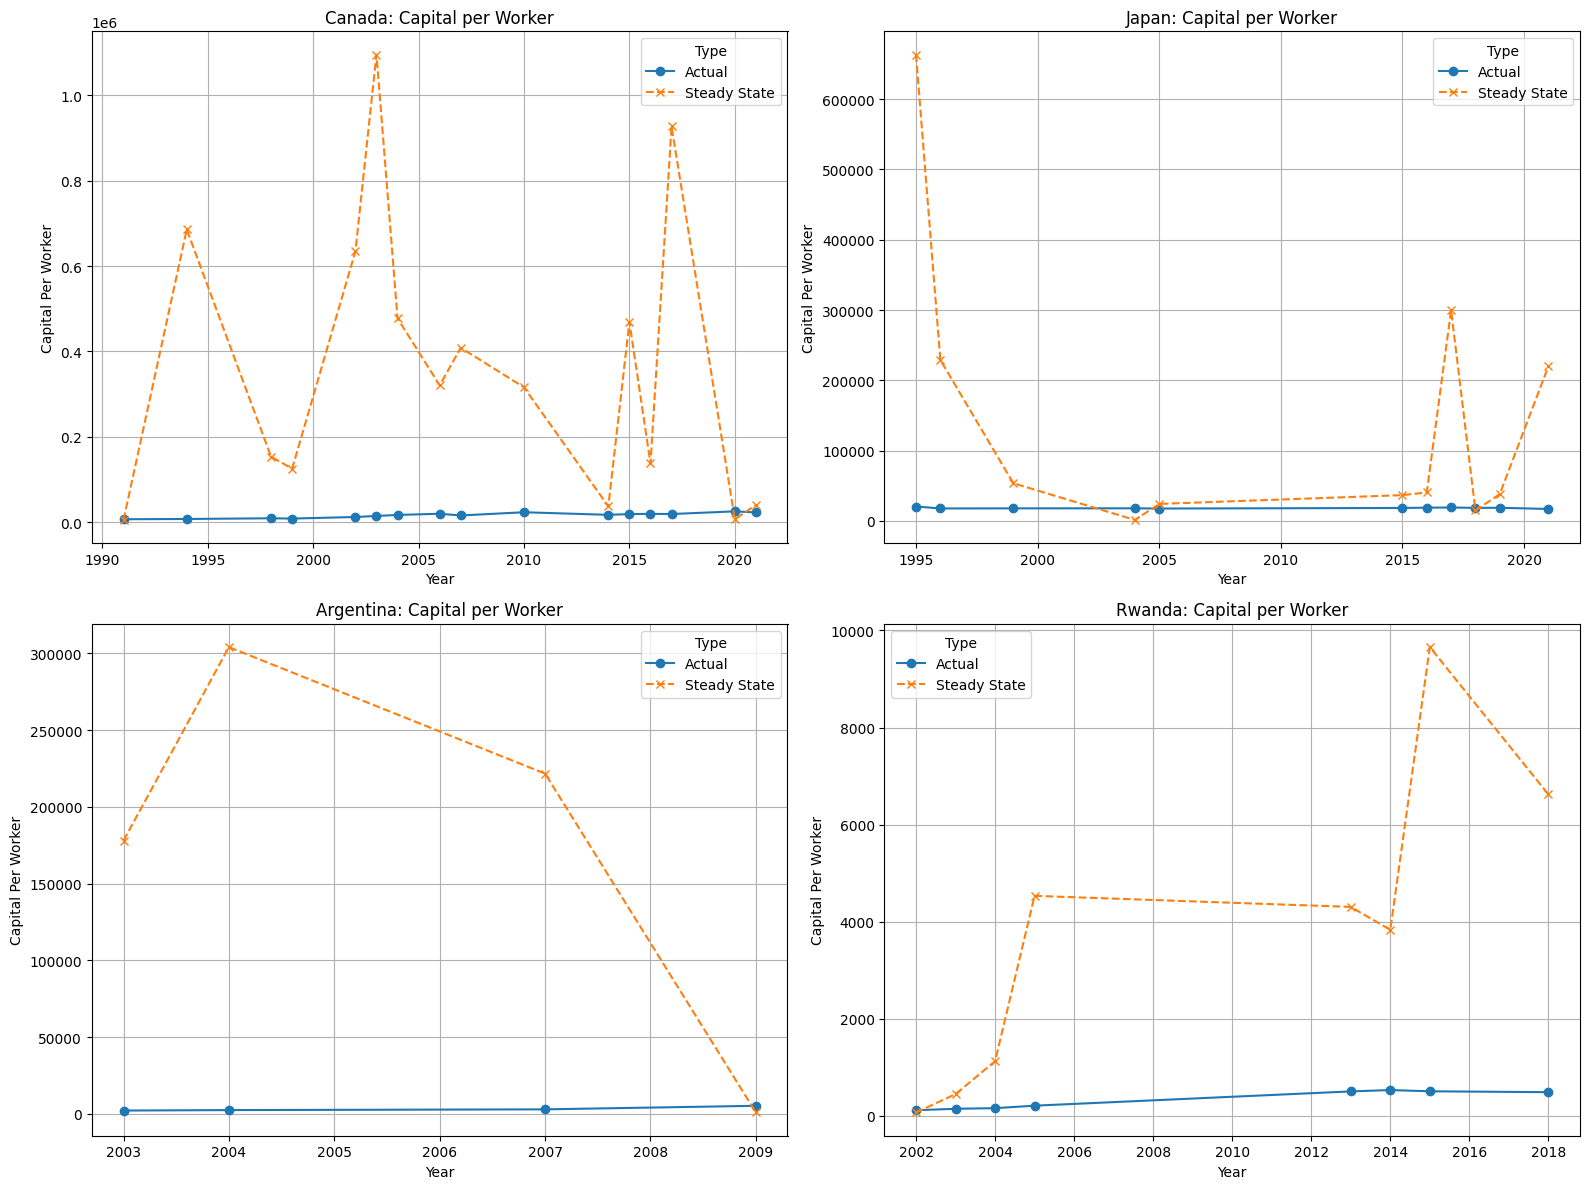

In [117]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid
countries = ["Canada", "Japan", "Argentina", "Rwanda"]  # Selected countries

def k_vs_kss(countries):
    for i, (country, ax) in enumerate(zip(countries, axes.flat)):
        country_data = solow_df[solow_df["Country"] == country]

        # Plot actual capital per worker
        ax.plot(country_data['Year'], country_data['Capital Per Worker'], 
                label='Actual', marker='o', linestyle='-')
        
        # Plot steady state capital per worker
        ax.plot(country_data['Year'], country_data['Steady State Capital Per Worker'], 
                label='Steady State', marker='x', linestyle='--')

        # Set title and labels
        ax.set_title(f"{country}: Capital per Worker")
        ax.set_xlabel('Year')
        ax.set_ylabel('Capital Per Worker')
        ax.legend(title="Type")
        ax.grid()

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Call the function
k_vs_kss(countries)

In [111]:
#to do list

To do list: 
- Track convergence over time (time-series analysis of steady state) 
> calculate capital gap 
- cluster countries based on fast/slow convergence and what they represent

Our team thought of another approach for our project, since steady state economy occurs when the economy is in the long-run, there should technically only be one steady state condition we should be comparing our actual capital per worker values to. Instead of doing our time dynamic approach, we wanted to see if we could yield more suitable results by adopting the same workflow above, but instead of finding the difference between $k_{ss}^{*}$ and $k$ each year, we find the difference between each consectuive $k$ to just the first $k_{ss}^{*}$.

In [31]:
earliest_kss = solow_df.groupby('Country')['Steady State Capital Per Worker'].first().reset_index()
earliest_kss

,Country,Steady State Capital Per Worker
0,Argentina,2.283702e+05
1,Australia,1.260177e+06
2,Bangladesh,7.388703e+03
3,Brazil,2.532718e+03
4,Canada,5.512086e+03
5,China,5.818266e+04
6,Colombia,1.206701e+05
7,Germany,2.282933e+04
8,Greece,5.715209e+04
9,India,3.382779e+04


In [ ]:
solow_df_2 = solow_df.merge(
    earliest_kss[['Country', 'Steady State Capital Per Worker']],
    on = 'Country',
    suffixes=('', ' (earliest)')
)
solow_df_2['Difference in Capital'] = (solow_df_2['Capital Per Worker'] - solow_df_2['Steady State Capital Per Worker']) #could be useful later on
solow_df_2.drop(columns=['Steady State Capital Per Worker_x', 'Steady State Capital Per Worker_y', 'Steady State Capital Per Worker'])

,Country,Year,Population Growth,Output Per Worker,Capital Per Worker,Savings Rate,TFP,Steady State Capital Per Worker (earliest),Difference in Capital
0,Argentina,1991,0.000000,16125.140891,3171.275686,0.172648,1127.447424,2.283702e+05,-2.251989e+05
1,Argentina,1992,-0.008112,17057.042866,3411.375422,0.169201,1164.225214,2.283702e+05,-2.249588e+05
2,Argentina,1993,-0.022022,16972.072980,3140.289576,0.180920,1190.515051,2.283702e+05,-2.252299e+05
3,Argentina,1994,-0.043645,17476.747092,3431.502736,0.189850,1190.558572,2.283702e+05,-2.249387e+05
4,Argentina,1995,-0.049602,18320.531263,3813.607184,0.186027,1205.305664,2.283702e+05,-2.245566e+05
...,...,...,...,...,...,...,...,...,...
739,United States,2017,-0.135280,128665.076314,27947.251460,0.190233,4387.011553,3.548588e+06,-3.520641e+06
740,United States,2018,1.133364,128584.862973,27528.027003,0.184977,4406.198600,3.548588e+06,-3.521060e+06
741,United States,2019,-0.838282,141998.799653,30325.167383,0.177119,4712.915086,3.548588e+06,-3.518263e+06
742,United States,2020,1.337949,152810.659239,33475.642471,0.181323,4909.000829,3.548588e+06,-3.515112e+06


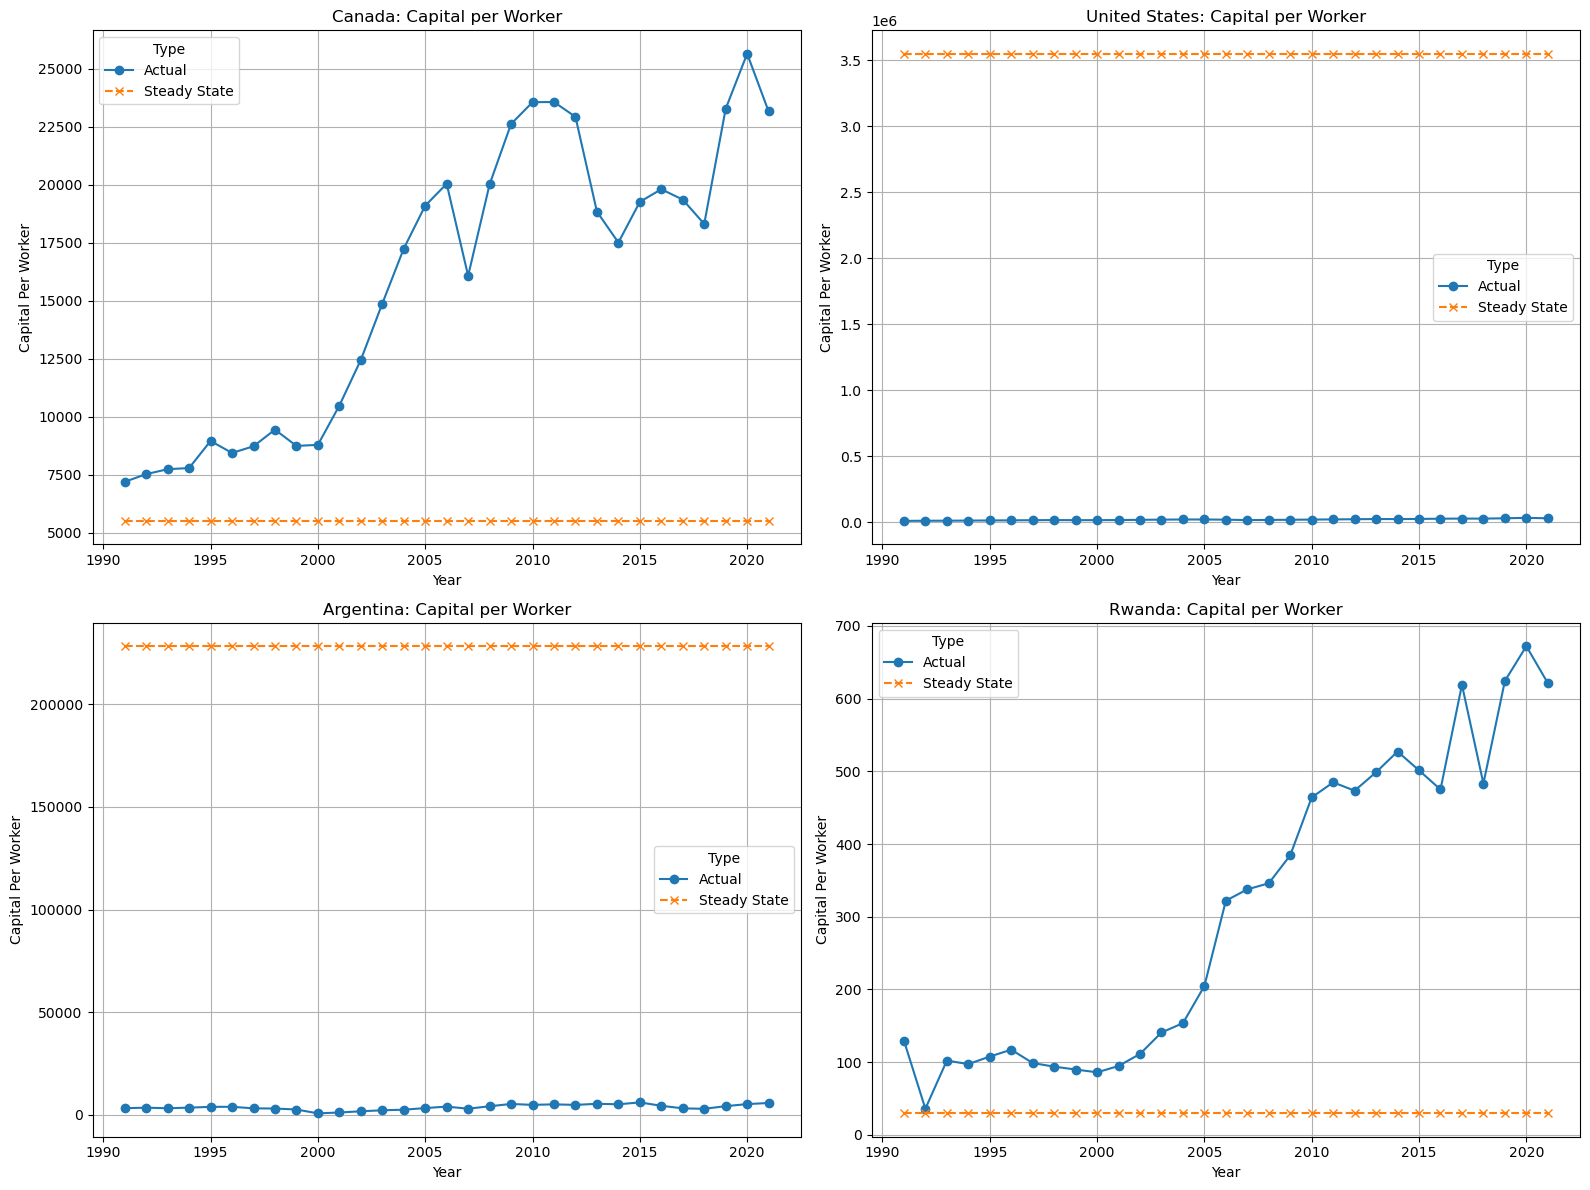

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid
countries = ["Canada", "United States", "Argentina", "Rwanda"]  # Selected countries

def k_vs_earliest_kss(countries):
    for i, (country, ax) in enumerate(zip(countries, axes.flat)):
        country_data = solow_df_2[solow_df_2["Country"] == country]

        # Plot actual capital per worker
        ax.plot(country_data['Year'], country_data['Capital Per Worker'], 
                label='Actual', marker='o', linestyle='-')
        
        # Plot steady state capital per worker
        ax.plot(country_data['Year'], country_data['Steady State Capital Per Worker (earliest)'], 
                label='Steady State', marker='x', linestyle='--')

        # Set title and labels
        ax.set_title(f"{country}: Capital per Worker")
        ax.set_xlabel('Year')
        ax.set_ylabel('Capital Per Worker')
        ax.legend(title="Type")
        ax.grid()

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Call the function
k_vs_earliest_kss(countries)